In [1]:
pip install tensorflow pandas numpy matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip setuptools

   ---------------------------------------- 883.3/883.3 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.3.0
    Uninstalling setuptools-65.3.0:
      Successfully uninstalled setuptools-65.3.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


In [23]:
# import important libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [11]:
# load and preprocess the data

batch_size = 32
img_height = 48
img_width = 48

train_ds = tf.keras.preprocessing.image_dataset_from_directory("data/train", 
                                                               image_size = (img_height, img_width), 
                                                              batch_size = batch_size , 
                                                              color_mode = "grayscale") 

test_ds = tf.keras.preprocessing.image_dataset_from_directory("data/test", 
                                                               image_size = (img_height, img_width), 
                                                              batch_size = batch_size , 
                                                              color_mode = "grayscale") 

val_ds = tf.keras.preprocessing.image_dataset_from_directory("data/val", 
                                                               image_size = (img_height, img_width), 
                                                              batch_size = batch_size , 
                                                              color_mode = "grayscale") 

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y,depth = 7)))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y,depth = 7)))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y,depth = 7)))

Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


In [16]:
# Build model

model = Sequential([
        Conv2D(32,(3,3), activation = 'relu',
              input_shape = (img_height, img_width,1)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3), activation = 'relu'),
        MaxPooling2D((2,2)), 
        Conv2D(128,(3,3), activation = 'relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation = 'relu'),
        Dropout(0.5),
        Dense(7, activation = 'softmax')
    ])

model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [17]:
# train the model 

history = model.fit(
         train_ds,
        validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
898/898 [==============================] - 64s 70ms/step - loss: 1.7315 - accuracy: 0.2958 - val_loss: 1.5506 - val_accuracy: 0.3918
Epoch 2/30
898/898 [==============================] - 72s 81ms/step - loss: 1.4932 - accuracy: 0.4261 - val_loss: 1.3454 - val_accuracy: 0.4912
Epoch 3/30
898/898 [==============================] - 65s 72ms/step - loss: 1.3732 - accuracy: 0.4727 - val_loss: 1.2757 - val_accuracy: 0.5155
Epoch 4/30
898/898 [==============================] - 62s 69ms/step - loss: 1.2943 - accuracy: 0.5048 - val_loss: 1.2525 - val_accuracy: 0.5149
Epoch 5/30
898/898 [==============================] - 62s 69ms/step - loss: 1.2440 - accuracy: 0.5280 - val_loss: 1.2155 - val_accuracy: 0.5316
Epoch 6/30
898/898 [==============================] - 64s 71ms/step - loss: 1.1911 - accuracy: 0.5483 - val_loss: 1.2157 - val_accuracy: 0.5311
Epoch 7/30
898/898 [==============================] - 65s 72ms/step - loss: 1.1495 - accuracy: 0.5619 - val_loss: 1.1945 - val_accuracy:

In [18]:
# evaluate model

test_loss, test_acc = model.evaluate(test_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

113/113 [==============================] - 2s 19ms/step - loss: 1.7401 - accuracy: 0.5606
Test Loss: 1.740148663520813
Test Accuracy: 0.5606018304824829


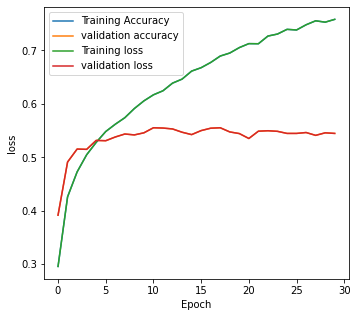

In [20]:
# visualize the training history

plt.figure(figsize = (12,5))

# plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot loss
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training loss')
plt.plot(history.history['val_accuracy'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()


plt.show()

In [34]:
# prediction inference 

def predict_emotion(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(48,48))
    img = img.reshape(1,48,48,1)/255.0
    prediction = model.predict(img)
    emotion_label = ['Angry', 'Disgust', 'Happy', 'Sad', 'Neutral', 'Surprise','Fear']
    predicted_emotion = emotion_label[np.argmax(prediction)]
    return predict_emotion

In [36]:
def predict_emotion(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = img.reshape(1, 48, 48, 1) / 255.0
    prediction = model.predict(img)
    emotion_label = ['Angry', 'Disgust', 'Happy', 'Sad', 'Neutral', 'Surprise', 'Fear']
    predicted_emotion = emotion_label[np.argmax(prediction)]
    return predicted_emotion  # Return

In [40]:
# Example
image_path = '5r.jpg'
predicted_emotion = predict_emotion(image_path)  # Remove the unary negation operator '-'
print(f'predicted_emotion: {predicted_emotion}')

1/1 [==============================] - 0s 44ms/step
predicted_emotion: Sad
